In [185]:
import numpy as np
import tsplib95
from python_tsp.distances.tsplib_distance import tsplib_distance_matrix

dataset = "data\pbl395.tsp"

cities = np.atleast_2d(list(tsplib95.load(dataset).node_coords.values()))
distance_matrix = tsplib_distance_matrix(dataset)


In [186]:
from sklearn.cluster import KMeans

N_CLUSTERS = 6

kmeans = KMeans(n_clusters=N_CLUSTERS).fit(cities)
print(kmeans.labels_)

LABELS = np.atleast_1d(kmeans.labels_)
CENTROIDS = np.atleast_2d(kmeans.cluster_centers_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4
 2 2 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 2 2 2
 2 5 5 5 5 5 5 5 5 2 4 4 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 4 4 4 4 5
 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 4 4 4 5 5 4 4 4 4 5 5 5 5 5 5 5 5 5 5
 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4
 4 4 4 4 4 4 4 5 5 5 5 4 5 4 4 4 4 4 0 0 4 4 4 0 0 0 0 0 0 4 0 4 4 4 0 0 0
 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 4
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 3 3 0 0 0 0 3
 3 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 3 3 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 3 3 3 3 3 1 1 1 3 1 1 1 3 3 3 1 3
 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1]


In [187]:
import matplotlib.pyplot as plt

def plot_initial_clusters(points, kmeans, centroids):
    # reduced_data = PCA(n_components=2).fit_transform(data)
    # kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
    # kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.01  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(points[:, 0], points[:, 1], "k.", markersize=2)
    # Plot the centroids as a white X

    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )

    for idx, c in enumerate(centroids):
        plt.annotate(idx, c, fontsize = 30)

    plt.title(
        "K-means clustering\n"
        "Centroids are marked with white cross"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

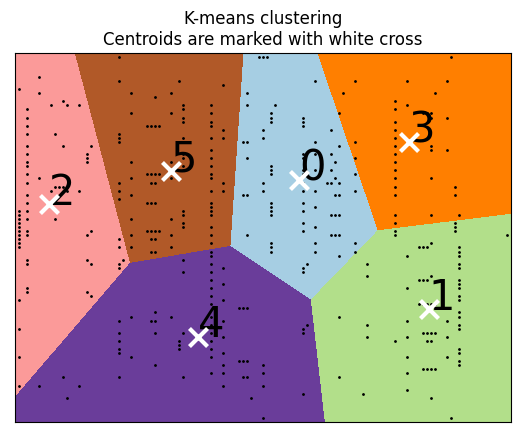

In [188]:
plot_initial_clusters(cities, kmeans, CENTROIDS)

In [189]:
from python_tsp.distances.euclidean_distance import euclidean_distance_matrix
from python_tsp.heuristics.local_search import solve_tsp_local_search
# from python_tsp.exact.dynamic_programming import solve_tsp_dynamic_programming

subproblems = []

for i in range(N_CLUSTERS):
    problem = np.atleast_2d([city for idx, city in enumerate(cities) if kmeans.labels_[idx] == i])
    subproblems.append(problem)

CLUSTERS = []
for p in subproblems:
    distance_matrix = euclidean_distance_matrix(p)
    permutation, distance = solve_tsp_local_search(distance_matrix)
    print(distance)
    subset = np.atleast_2d([p[x] for x in permutation])
    # print(subset)
    CLUSTERS.append(subset)


267.85290904714907
261.69722301260634
241.42510198494963
177.3471285186006
284.9570874734621
266.61754676417996


In [190]:
from math import dist

def plot_clusters(points, clusters, centroids):
    
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1

    plt.plot(points[:, 0], points[:, 1], "k.", markersize=2)

    for cluster in clusters:
        for i in range(len(cluster) - 1):
            plt.plot(cluster[[i, i+1], 0], cluster[[i, i+1], 1], c="k")
        plt.plot(cluster[[len(cluster) - 1, 0], 0], cluster[[len(cluster) - 1, 0], 1], c="k")

    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="k",
        zorder=10,
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

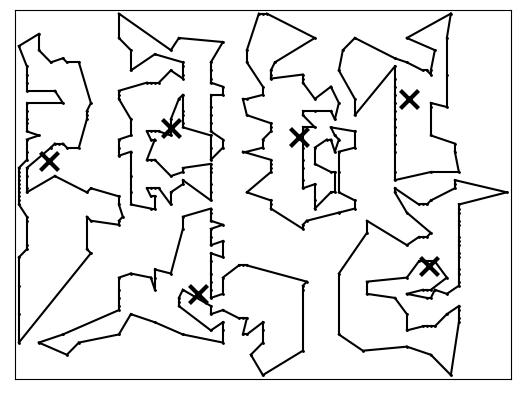

In [191]:
plot_clusters(cities, CLUSTERS, CENTROIDS)

In [192]:
def concatenate_clusters(cluster_a: np.ndarray, cluster_b: np.ndarray, centroid_a: np.ndarray, centroid_b: np.ndarray) -> (np.ndarray, np.ndarray):
    
    def get_closest_points_to_centroid(cluster, centroid):

        distances = []
        for point in cluster:
            distances.append((point, dist(point, centroid)))
        distances.sort(key=lambda x: x[1])
        p1 = distances[0][0]

        idx1 = [idx for idx, x in enumerate(cluster) if x[0] == p1[0] and x[1] == p1[1]][0]

        forward = idx1 + 1
        if forward >= len(cluster):
            forward = 0
        backward = idx1 - 1

        new_perm = list(cluster)

        if dist(cluster[forward], centroid) < dist(cluster[backward], centroid):
            p2 = cluster[forward]
            idx2 = forward
            new_perm = new_perm[idx1::-1] + new_perm[:idx2 - 1:-1]
        else:
            p2 = cluster[backward]
            idx2 = backward
            new_perm = new_perm[idx1:] + new_perm[:idx2 + 1]

        return p1, p2, np.atleast_2d(new_perm)
    
    p1, p2, new_cluster_a = get_closest_points_to_centroid(cluster_a, centroid_b)

    def get_closest_points_to_points(cluster, p1, p2):

        distances = []
        for point in cluster:
            distances.append((point, dist(point, p1)))
        distances.sort(key=lambda x: x[1])
        p3 = distances[0][0]

        distances = []
        for point in cluster:
            if point[0] != p3[0] and point[1] != p3[1]:
                distances.append((point, dist(point, p2)))
        distances.sort(key=lambda x: x[1])
        p4 = distances[0][0]

        idx1 = [idx for idx, x in enumerate(cluster) if x[0] == p3[0] and x[1] == p3[1]][0]

        forward = idx1 + 1
        if forward >= len(cluster):
            forward = 0
        backward = idx1 - 1

        new_perm = list(cluster)

        if dist(cluster[forward], p2) < dist(cluster[backward], p2):
            p4 = cluster[forward]
            idx2 = forward
            new_perm = new_perm[idx1::-1] + new_perm[:idx2 - 1:-1]
        else:
            p4 = cluster[backward]
            idx2 = backward
            new_perm = new_perm[idx1:] + new_perm[:idx2 + 1]

        return p3, p4, np.atleast_2d(new_perm)

    p3, p4, new_cluster_b = get_closest_points_to_points(cluster_b, p1, p2)
    
    result = new_cluster_a
    result = np.concatenate((result, np.flip(new_cluster_b, 0)), axis=0)

    def get_centeroid(arr):
        x = np.mean(arr[:, 0])
        y = np.mean(arr[:, 1])
        return np.atleast_1d([x, y])
    
    return result, get_centeroid(result)

In [193]:
def concatenate_all(clusters, centroids):

    t_clusters = list(clusters)
    t_centroids = list(centroids)

    while len(t_clusters) > 1:
        A = 0
        B = 1

        for i in range(1, len(t_centroids)):
            if (dist(t_centroids[i], t_centroids[A]) < dist(t_centroids[B], t_centroids[A])):
                B = i
        # print(A, B)

        new_cluster, new_centroid = concatenate_clusters(t_clusters[A], t_clusters[B], t_centroids[A], t_centroids[B])

        t_clusters = [np.atleast_2d(x) for idx, x in enumerate(t_clusters) if idx != A and idx != B]
        t_centroids = [x for idx, x in enumerate(t_centroids) if idx != A and idx != B]

        t_clusters.append(new_cluster)
        t_centroids.append(new_centroid)
        t_centroids = np.atleast_2d(t_centroids)
        plot_clusters(cities, t_clusters, t_centroids)

    return t_clusters[0], t_centroids[0]

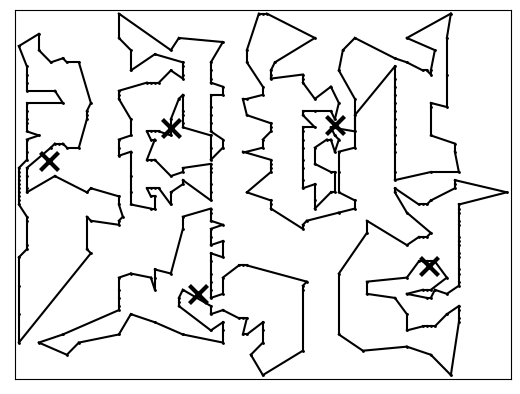

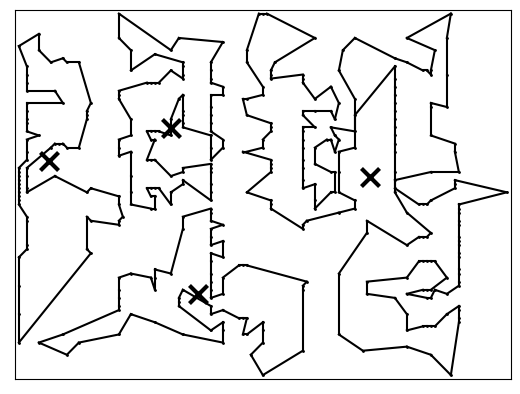

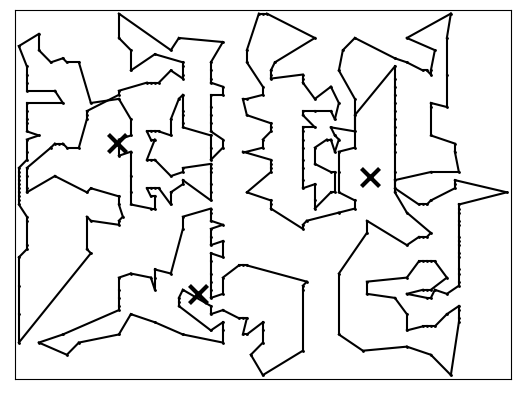

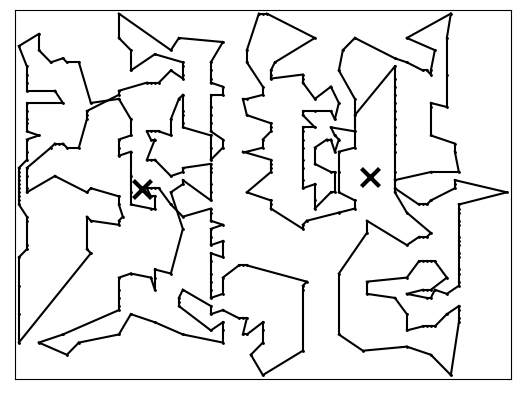

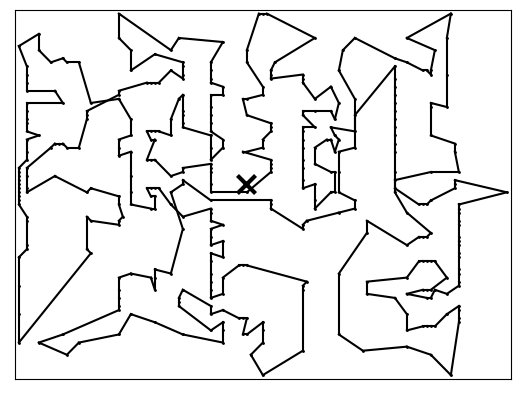

In [194]:
result, centroid = concatenate_all(CLUSTERS, CENTROIDS)

In [195]:
def plot_path(points):
    
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1

    plt.plot(points[:, 0], points[:, 1], "k.", markersize=2)

    for i in range(len(points) - 1):
        plt.plot(points[[i, i+1], 0], points[[i, i+1], 1], c="k")
    plt.plot(points[[len(points) - 1, 0], 0], points[[len(points) - 1, 0], 1], c="k")

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

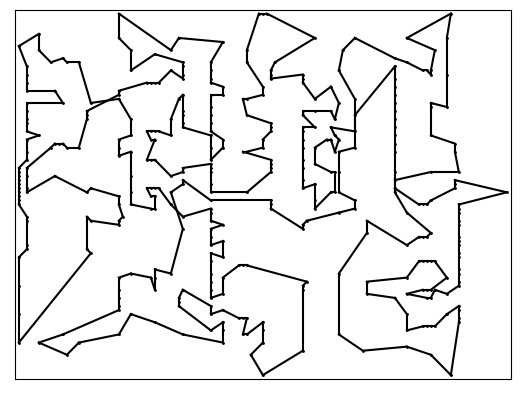

In [196]:
plot_path(result)

In [197]:
cost = 0
for i in range(len(result) - 1):
    cost += dist(result[i], result[i + 1])
cost += dist(result[-1], result[0])
print(cost)

1548.0811868926014


In [198]:
perm = [idx for idx, x in enumerate(result)]

In [199]:
distance_matrix = euclidean_distance_matrix(result)

permutation, distance = solve_tsp_local_search(distance_matrix)

print(distance)

1420.1416083511072


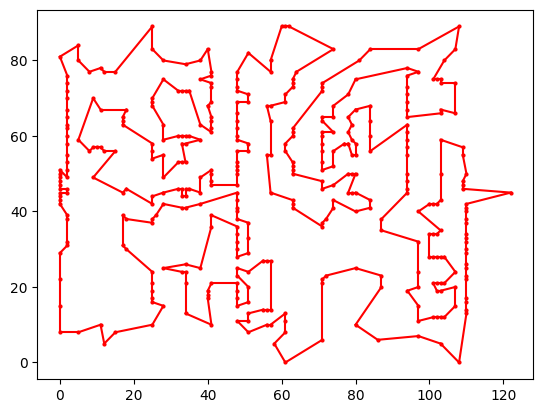

In [200]:
plt.plot(result[:, 0], result[:,1], 'or', markersize=2)

for i in range(len(permutation) - 1):
    plt.plot(result[[permutation[i], permutation[i+1]], 0], result[[permutation[i], permutation[i+1]], 1], c="r")

plt.plot(result[[permutation[len(result) - 1], 0], 0], result[[permutation[len(result) - 1], 0], 1], c="r")

plt.show()